In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load dataset

In [9]:
df = pd.read_csv(r"C:\Users\sucha\OneDrive\Desktop\PROJECTS\EDA AND ML PROJECTS\Laptop price pred\laptop.csv")

In [10]:
df1 = df.copy()

Check for null values

In [11]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

Remove null values

In [13]:
df.dropna(inplace=True)

Check and remove duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

Remove unnecessery column

In [17]:
df.columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'],inplace=True)

In [19]:
df.replace(["?","NA","N/A","--","-"],np.nan,inplace=True)

In [20]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [21]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [22]:
df.isna().sum()

Company             0
TypeName            0
Inches              1
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              1
Gpu                 0
OpSys               0
Weight              1
Price               0
dtype: int64

In [77]:
def hist_plot(col):
    plt.figure(figsize=(12,4))
    sns.histplot(col,kde=True)
    plt.show()
def box_plot(col):
    plt.figure(figsize=(12,4))
    sns.boxplot(col)
    plt.show()

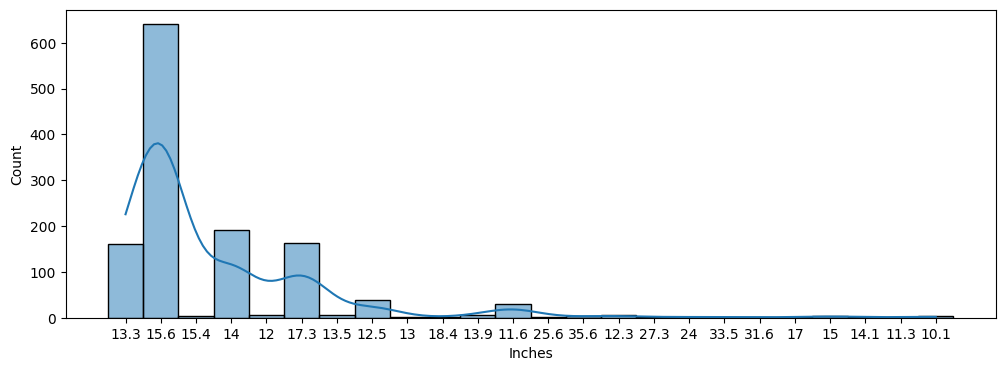

In [71]:
hist_plot(df['Inches'])

In [87]:
df['Inches']=df['Inches'].astype('Float64')

In [88]:
df['Inches']=df.groupby(['Company','TypeName'])['Inches'].transform(lambda x:x.fillna(x.median()))

In [104]:
df['Memory']=df['Memory'].str.split(' ',n=1).str[0]
df['Storage']=df1['Memory'].str.split(' ',n=1).str[1]

In [141]:
df['Weight']=df['Weight'].str.replace("kg","").astype('Float64')

In [145]:
df['Weight']=df.groupby(['Company','TypeName'])['Weight'].transform(lambda x:x.fillna(x.mode()[0]))

In [146]:
missing_rows = df[df['Weight'].isna()][['Weight']]
print(missing_rows)

Empty DataFrame
Columns: [Weight]
Index: []


In [147]:
df['Weight'].isna().sum()

np.int64(0)

replace nan value in storage column

In [150]:
df['Storage'].isna().sum()

np.int64(1)

In [151]:
df['Storage']=df.groupby(['Company','TypeName'])['Storage'].transform(lambda x:x.fillna(x.mode()[0]))

In [152]:
df['Storage'].isna().sum()

np.int64(0)

In [153]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
Storage             0
dtype: int64

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   Float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   Float64
 10  Price             1273 non-null   float64
 11  Storage           1273 non-null   object 
dtypes: Float64(2), float64(1), object(9)
memory usage: 164.1+ KB


In [156]:
df['Ram']=df['Ram'].str.replace("GB","").astype('Int64')

In [163]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [164]:
df['Touchscreen']=df['ScreenResolution'].str.contains('Touchscreen',case=False).astype(int)
df['IPS']=df['ScreenResolution'].str.contains('IPS',case=False).astype(int)

In [172]:
df['X_resolution']=df['ScreenResolution'].str.split("x",n=1,expand=True)[0]
df['Y_resolution']=df['ScreenResolution'].str.split("x",n=1,expand=True)[1].astype(int)

In [176]:
df['X_resolution']=df['X_resolution'].str.extract(r'(\d+)').astype(int)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   Float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   Int64  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   Float64
 10  Price             1273 non-null   float64
 11  Storage           1273 non-null   object 
 12  Touchscreen       1273 non-null   int64  
 13  IPS               1273 non-null   int64  
 14  X_resolution      1273 non-null   int64  
 15  Y_resolution      1273 non-null   int64  
dtypes: Float64(2), Int64(1), float64(1), int64(4), 

In [181]:
df.select_dtypes(exclude='object').corr()['Price']

Inches          0.044966
Ram             0.685648
Weight          0.175437
Price           1.000000
Touchscreen     0.188994
IPS             0.254851
X_resolution    0.082780
Y_resolution    0.554069
Name: Price, dtype: float64